# Part 2. Randomized algorithms
## 2.1 Las Vegas algorithms: median and k-th smallest element

In [1]:
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

### 2.1.1 Deterministic algorithms
#### 2.1.1 a) Maximum and minimum of an array

Here's the simple brute-force implementation of this algorithm.


In [2]:
def max_min(array):
    maximum = array[0]
    minimum = array[0]

    for _, element in enumerate(array):
        if element > maximum:
            maximum = element
        elif element < minimum:
            minimum = element

    return maximum, minimum

However, this solution is obviously not the best one. Let's take a look at this if statement:
```python
if element > maximum:
    maximum = element
elif element < minimum:
    minimum = element
```

In the best case, first if statement will be true at every step of the loop, so the second comparison is never made. It will happen, when array is sorted in ascending order. Intuitively, in the worst case there will be two comparisons at each step.

Total number of comparisons is $2n-2$ in the worst case, and $n-1$ in the best case, therefore time complexity is $O(n)$

So we can try to implement a better algorithm using divide and conquer strategy:

In [3]:
def recursive_max_min(array):
    if len(array) == 1:
        return array[0], array[0]
    elif len(array) == 2:
        return (array[0], array[1]) if array[0] < array[1] else (array[1], array[0])
    else:
        mid = len(array) // 2
        left_min, left_max = recursive_max_min(array[:mid])
        right_min, right_max = recursive_max_min(array[mid:])

        return min(left_min, right_min), max(left_max, right_max)

Here, we're dividing our array into two halves by the midpoint, until length of array will be 1 or 2. Then we recursively find the maximum and minimum of left and right pairs and then compare both parts to aggregate them.

Let's write down the time complexity equation for this one: $T(n) = 2T(n/2) + 2$. Here $2 = n^0 < n^{log_b a} = n^{log_2 2}$, so we can apply the first case of the master theorem, which states that $T(n) = Θ(n^{log_2 2}) = O(n)$

We see that asymptotically these algorithms are similar, but recursive one will make fewer comparisons.

*Explanation*: Until the $i-1$ level of recursion, every combine step will require 2 comparisons. At each $i-th$ level there is $2^i$ elements, so will require $2*2^i = 2^{i+1}$ comparisons. At the last level, only $2^i$ comparisons will be made (if $n$ is a power of 2). So, the total number of comparisons is $2 + 4 + 8 + ... + 2^i + 2^i$. By the sum of geometric progression, this is equal to $2*(2^i - 1) + 2^i$. Since maximum $i$ or recursion depth is equal to $log_2 n - 1$: $2*(2^i - 1) + 2^i = 2^{i+1} + 2^i - 2 = n + n/2 - 2 = 3n/2 - 2$ comparisons.

#### 2.1.1 b) Median of an array via quicksort paradigm


Here is the simple implementation of deterministic quick selection algorithm:


In [4]:
def quickselect(array, k):
    len_array = len(array)

    if len_array == 1:
        return array[0]

    pivot = array[0]
    left = [x for x in array if x < pivot]
    right = [x for x in array if x > pivot]

    len_left = len(left)
    len_right = len(right)

    if k <= len_left:
        return quickselect(left, k)
    elif k > len_array - len_right:
        return quickselect(right, k - (len_array - len_right))
    else:
        return pivot

Using it, we can easily find the median of the array:

In [5]:
def median(array):
    len_array = len(array)
    if len_array % 2 == 0:
        return (quickselect(array, len_array/2) + quickselect(array, len_array/2 + 1)) / 2.0
    else:
        return quickselect(array, (len_array + 1)/2)

#### 2.1.1 c) k-th smallest element of an array via quicksort paradigm

Since quickselect designed to find the k-th smallest element by default:

In [6]:
def kth_smallest(array, k):
    return quickselect(array, k)

### 2.1.2 Randomized algorithms by taking uniformly random pivots
#### 2.1.2 a) Median of an array via randomized quicksort paradigm

Now let's implement the randomized quickselect. The only difference between them is obviously in choosing pivot:

In [7]:
def randomized_quickselect(array, k):
    len_array = len(array)

    if len_array == 1:
        return array[0]

    pivot = random.choice(array)
    left = [x for x in array if x < pivot]
    right = [x for x in array if x > pivot]

    len_left = len(left)
    len_right = len(right)

    if k <= len_left:
        return randomized_quickselect(left, k)
    elif k > len_array - len_right:
        return randomized_quickselect(right, k - (len_array - len_right))
    else:
        return pivot

And then find the median:

In [8]:
def randomized_median(array):
    len_array = len(array)
    if len_array % 2 == 0:
        return (randomized_quickselect(array, len_array/2) + randomized_quickselect(array, len_array/2 + 1)) / 2.0
    else:
        return randomized_quickselect(array, (len_array + 1)/2)

#### 2.1.2 b) k-th the smallest element of an array via randomized quicksort paradigm

Analogically, k-th smallest:

In [9]:
def randomized_kth_smallest(array, k):
    return randomized_quickselect(array, k)

### 2.1.3 Derive the time complexities

#### 2.1.3 a)

Quickselect time complexity actually depends on function choosing pivot. Let's consider the best case as $O(n)$ and the worst case as $O(n^2)$.

**Worst case**:
*Expected complexity*: $O(n^2)$
*Explanation*: Worst case only occurs when the largest/smallest element in an array is being chosen as pivot. This yields two arrays of length $1$ and $n-1$. Since we know, that algorithm always reduces the size of the subarray to recurse on by 1, we can write down the time complexity equation: $$T(n) = \Theta(n) + T(n-1)$$

Thus, we get $$\Theta(n + (n-1) + (n-2) + ... + 1) = \Theta\left(\frac{n(n+1)}{2}\right) = \Theta(n^2)$$


**Best case**
*Expected complexity*: $O(n)$
*Explanation*: The best-case occurs when algorithm chooses the k-th the largest element as the pivot in the very first call. Then, the algorithm performs $\Theta(n)$ steps during the first partitioning, after which it terminates. Therefore, time complexity is $\Theta(n) = O(n)$ in the best case.

#### 2.1.3 b)

To derive the expectation, let’s first define random variables $X_{i,j} (i=1,2,\ldots,n-1; j=i+1,i+2,\ldots,n)$:

$$X_{i,j} = \begin{cases} 1,\ &i \text{ and } j\ \text{get compared at any time during execution}\\ 0,& \text{otherwise} \end{cases}$$

So, the total number of comparisons algorithm makes when searching through an array of $n$ numbers is then:

$$\sum_{i=1}^{n-1}\sum_{j=i+1}^{n}X_{i,j}$$

Thus, the average (expected) number of comparisons for input of size $n$ is:

$$ E_c=E\left[\sum_{i=1}^{n-1}\sum_{j=i+1}^{n}X_{i,j}\right] = \sum_{i=1}^{n-1}\sum_{j=i+1}^{n}E[X_{i,j}] = \sum_{i=1}^{n-1}\sum_{j=i+1}^{n}q_{i,j} $$

where $q_{i,j}$ is the probability that $X_{i,j}=1$. To calculate $q_{i,j}$ let's consider three cases:

1. $k \leq i < j$
2. $i < j \leq k$
3. $i < k < j$

If QuickSelect chooses $k$ as a pivot or a number that is between $i$ and $j$, it does not compare them. It is valid in each of the three scenarios. If $k$ becomes the pivot, the algorithm has found the value it was looking for and the search is finished. When dividing, if the pivot is between $i$ and $j$, $i$ ends up in the left subarray and $j$ in the right subarray. As a result, the algorithm can only compare components that are called into the same subarray.

However, this algorithm performs a recursive call to compare the pivot element to every other integer. In order to compare $i$ and $j$, algorithm should select either $i$ or $j$ as the pivot before to any other number from the related case's range.

Given that the pivots are distributed at random, the likelihood of selecting any integer from the range $[a, b]$ is $\frac{1}{b-a+1}$. Since the selections of $i$ and $j$ as the first pivot from $[a, b]$ are mutually exclusive events, we can sum their probabilities to get $q_{i,j}$ in each case:

$$q_{i,j} = \begin{cases} \frac{1}{j-k+1}+\frac{1}{1-k+1}=\frac{2}{j-k+1},&\ k \leq i < j \\ \frac{1}{k-i+1}+\frac{1}{k-i+1}=\frac{2}{k-i+1},& i < j \leq k \\ \frac{1}{j-i+1}+\frac{1}{j-i+1}=\frac{2}{j-i+1},& i < k < j \end{cases}$$

We can split $E_c$ into summations by each case and then add together the obtained sums. In case 1, we have:

$$\begin{aligned} \sum_{j=k+1}^{n}\sum_{i=k}^{i-1}\frac{2}{j-k+1} &= \sum_{j=k+1}^{n}(j-k)\cdot \frac{2}{j-k+1} \\ &=2\sum_{j=k+1}^{n} \frac{j-k}{j-k+1} \\ &\leq 2 (n -k) \qquad \forall(j>k)(\frac{j-k}{j-k+1}<1) \\ &\leq 2n \in O(n) \end{aligned}$$

For case 2 result is pretty much similar:

$$\begin{aligned} \sum_{i=1}^{k-1}\sum_{j=i+1}^{k}\frac{2}{k-i+1} &= \sum_{i=1}^{k-1}(k-i)\cdot \frac{2}{k-i+1} \\ &=2\sum_{i=1}^{k-1} \frac{k-i}{k-i+1} \\ &\leq 2(k-1) \qquad \forall(i<k)(\frac{k-i}{k-i+1}<1) \\ &\leq 2k \\ & \leq 2n \in O(n) \end{aligned}$$

In case 3 time complexity will also be $O(n)$:

$$\sum_{i=1}^{k-1}\sum_{j=k+1}^{n}\frac{2}{j-i+1} = 2 \left(\frac{1}{k+1}+\frac{1}{k+2}+\ldots+\frac{1}{n}\right)+2\left(\frac{1}{k}+\frac{1}{k+1}+\ldots+ \frac{1}{n-1}\right)+\ldots + \left(\frac{1}{3}+\frac{1}{4}+\ldots + \frac{1}{n-k+2}\right) \\= 2 (H_n-H_{k}) + 2(H_{n-1}-H_{k-1})+\ldots +2(H_{n-k+2}-H_3)$$

We used the definition $H_m=\sum_{i=1}^{m}\frac{1}{i}$. Since $\ln m \leq H_m = \ln m + 1 \text{ for all m} \geq 2$, we have:

$$\begin{aligned} \sum_{i=1}^{k-1}\sum_{j=k+1}^{n}\frac{2}{j-i+1} &\leq 2(\ln n + 1 - \ln k) + 2(ln(n-1)+1 \ln (k-1)) + \ldots + 2(\ln(n-k+2)+1-\ln 2)\\ &\leq \ln \frac{n}{k} + \ln \frac{n-1}{k-1} + \ldots \frac{n-k+2}{2} \\ &\leq \ln \frac{n}{k} + \ln \frac{n-1}{k-1} + \ldots \ln\frac{n-k+2}{2} + \ln\frac{n-k+1}{1} \\ & = \ln \frac{n(n-1)\cdot\ldots\cdot (n-k+1)}{k(k-1)\cdot\ldots\cdot 2\cdot 1} \\ &= \ln \binom{n}{k} \\ &\leq \ln 2^n = (\ln 2)n \in O(n) \end{aligned}$$

So, the average time complexity of QuickSelect is $O(n)$.

#### 2.1.3 c)

**Inductive Hypothesis**: $T(n) \leq 4n$
* *Base case $(n = 1)$*: The input of size 1 requires no actions. Thus, $T(n) = 0$ and the inductive hypothesis is true for $n = 1$.
* *Inductive step*: We will show that if the inductive hypothesis is true for all $n \leq k − 1$, then
the inductive hypothesis is also true for $n = k$.

By applying induction:
$$
\begin{aligned}
T(n) & \leq n+\frac{1}{n}\left(\sum_{i=1}^{j-1} T(n-i)+\sum_{i=j} T(i-1)\right) \\
& \leq n+\frac{4}{n}\left(\sum_{i=1}^{j-1}(n-i)+\sum_{i=j}^{n}(i-1)\right) \quad
\end{aligned}
$$

Now, let's analyze this inequality:

$$
\begin{aligned}
T(n) \leq & n+\frac{4}{n}\left(\sum_{i=1}^{j-1}(n-i)+\sum_{i=j}^{n}(i-1)\right) \\
\leq & n+\frac{4}{n}\left(\frac{(j-1)(2 n-j)}{2}+\frac{(n-j+1)(n+j-2)}{2}\right) \\
\leq & n+\frac{4}{2 n}\left(n^{2}+2 n j-2 j^{2}-3 n+4 j-2\right) \\
& \text { expression above reaches maximum when } j=\frac{n+1}{2} \\
\leq & n+\frac{4}{2 n}\left(\frac{3 n^{2}}{2}-n\right) \quad \\
\leq & n+ \frac{3\cdot4 n}{4} \\
\leq & 4n
\end{aligned}
$$

So, we have shown that $T(n) \leq 4n$ using induction.

### 2.1.4 Obtain actual execution times in experiments for the following inputs:
* For sorted array
* For inversely sorted array
* For randomly sorted array

To obtain actual execution times, I'll use some auxiliary methods:


In [10]:
def timeit(func, array, number=1, *args, **kwargs):
    import timeit
    smallest_time = timeit.timeit(lambda: func(array.copy(), *args, **kwargs), number=1)
    for i in range(1, number):
        time = timeit.timeit(lambda: func(array.copy(), *args, **kwargs), number=1)
        if time < smallest_time:
            smallest_time = time
    return smallest_time


def generate_random_array(size, min_value=0, max_value=100, sort=False, inverse=False):
    random_array = np.random.randint(min_value, max_value, size)
    if sort:
        random_array.sort()
    if inverse:
        random_array[::-1].sort()

    return random_array

sys.setrecursionlimit(100000)

Now we can measure execution times and use heatmap for visual representation. It's better here in my opinion than plotting graphs:

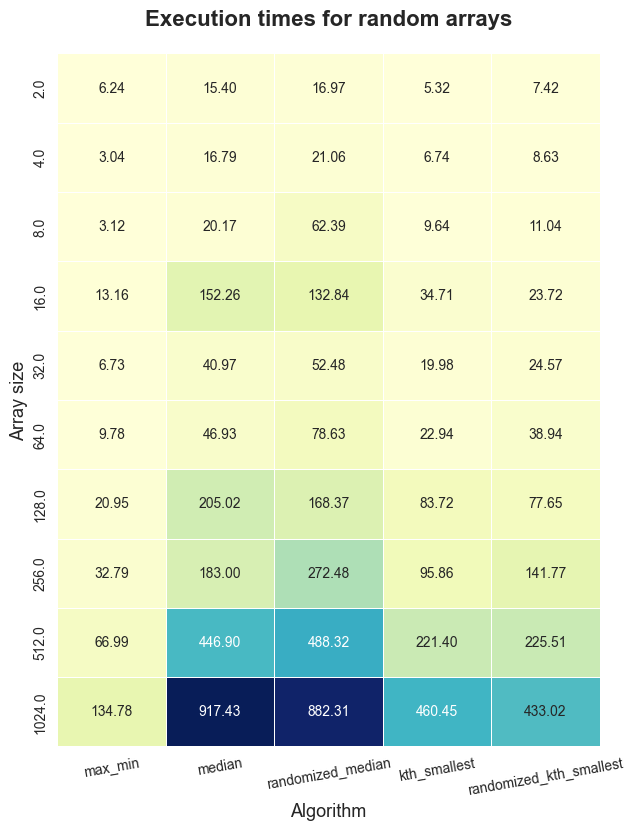

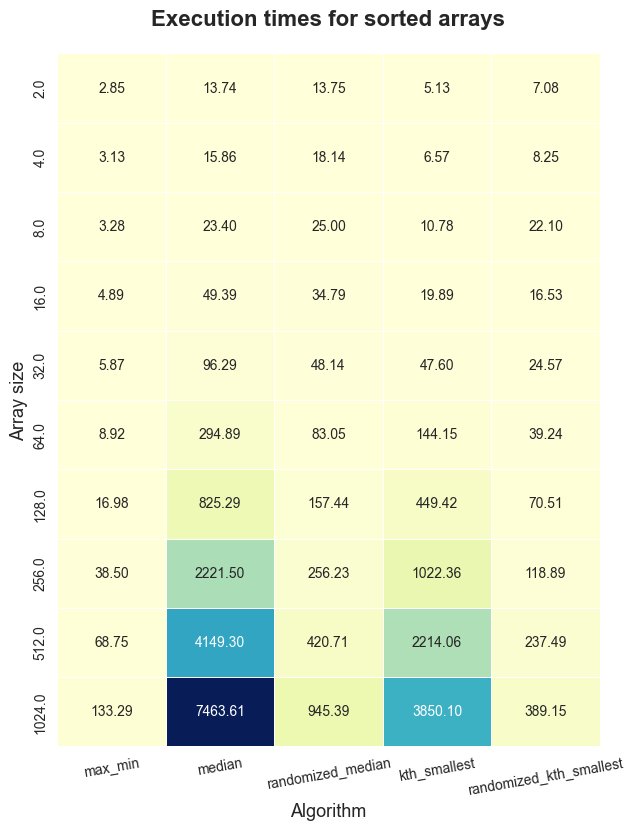

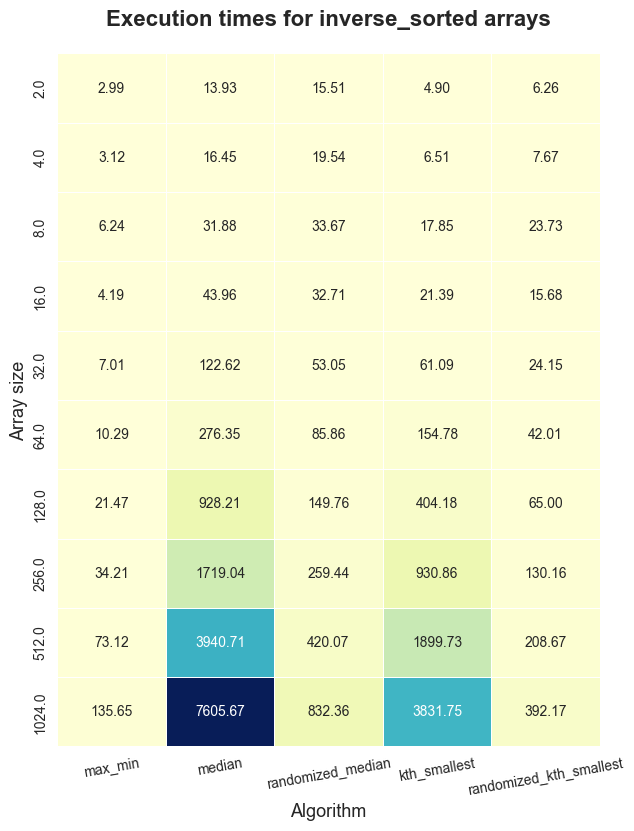

In [37]:
sizes = np.array([2 ** i for i in range(1, 11)])
array_types = ['random', 'sorted', 'inverse_sorted']

execution_times = pd.DataFrame(columns=['size', 'array_type', 'algorithm', 'time'], dtype=np.float64)
millisec = 1000

for size in sizes:
    for array_type in array_types:
        array = generate_random_array(size, sort=(array_type == 'sorted'), inverse=(array_type == 'inverse_sorted'))

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['max_min'],
            'time': [timeit(max_min, array, 1000) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['median'],
            'time': [timeit(median, array, 1000) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['randomized_median'],
            'time': [timeit(randomized_median, array, 1000) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['kth_smallest'],
            'time': [timeit(kth_smallest, array, 1000, k=size // 2) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['randomized_kth_smallest'],
            'time': [timeit(randomized_kth_smallest, array, 1000, k=size // 2) * millisec]
        })])

for array_type in array_types:
    random_execution_times = execution_times[execution_times['array_type'] == array_type]
    pivot = random_execution_times.pivot(index='size', columns='algorithm', values='time')
    pivot = pivot[['max_min', 'median', 'randomized_median', 'kth_smallest', 'randomized_kth_smallest']]

    plt.figure(figsize=(7, 9))

    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5, cbar=False)

    plt.title(f'Execution times for {array_type} arrays', fontsize=16, pad=20, fontweight='bold')

    plt.xlabel('Algorithm', fontsize=13)
    plt.xticks(rotation=10)
    plt.ylabel('Array size', fontsize=13)
    plt.show()

Here we can see, how faster is randomized algorithms for already sorted arrays. Even at the size of 32 elements for both cases the difference is visible. This is achieved by randomly choosing the pivot and allows us to avoid the worst case that occurs if we simply choose the first or last element of the array as the pivot, because then the arrays are recursively divided not in half, but into arrays of size $1$ and $n-1$ which leads to $\sum_{i=0}^{n} (n - i) = O(n^2)$ recursive calls

Choosing the pivot randomly has the effect of rendering the worst-case very unlikely (but not impossible), particularly for large arrays. Here I will not waste your time by proving the expected value of number of comparisons for randomized quicksort mathematically, but I've found a very well-explained and useful paper about this topic - [Randomized version of quick-sort](https://cse.buffalo.edu/~shil/courses/CSE632-Fall2019/Notes/8-Quicksort.pdf)

### 2.1.5 Plot the dependency of execution time on problem size n


However, it's useful to illustrate the actual curves of randomized and deterministic algorithms for different array types in comparison:

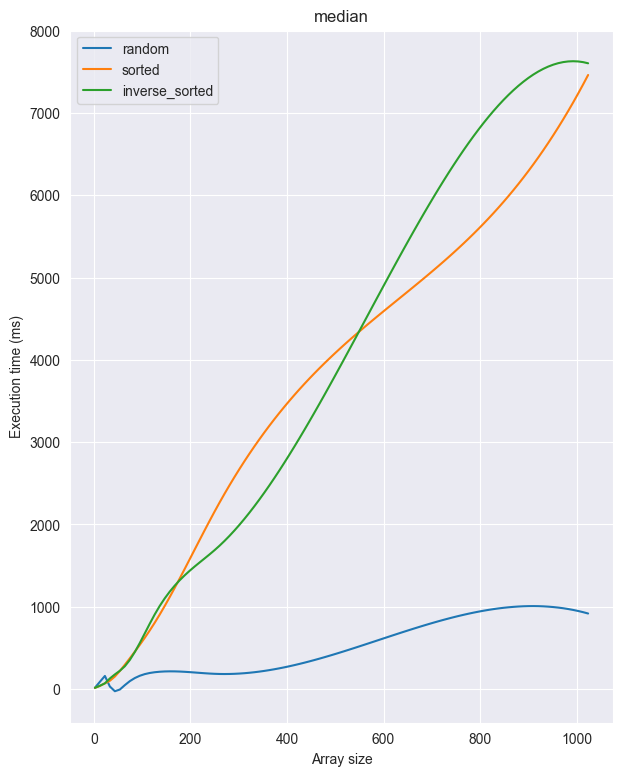

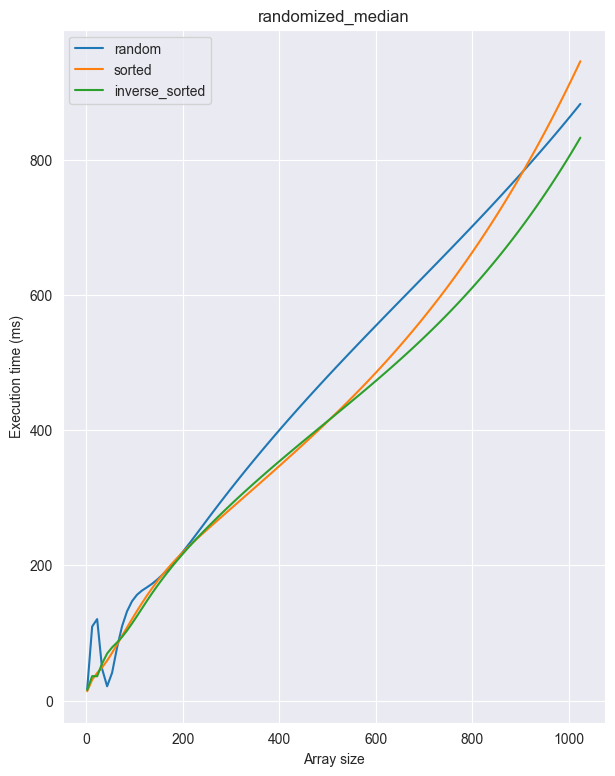

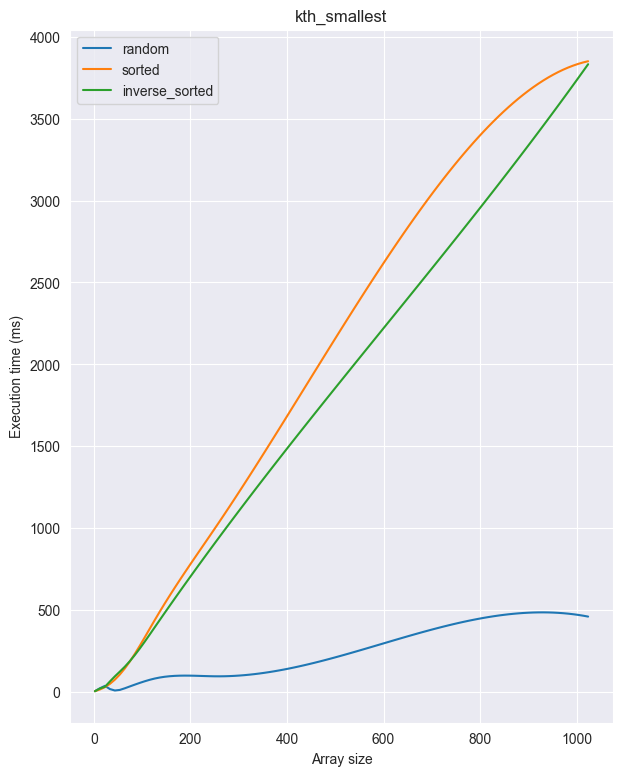

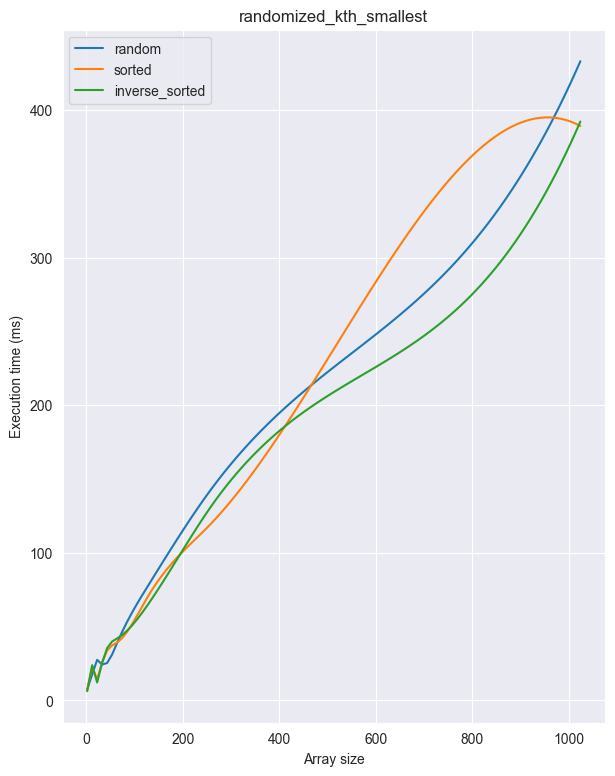

In [38]:
for algorithm in ['median', 'randomized_median', 'kth_smallest', 'randomized_kth_smallest']:
        random_execution_times = execution_times[execution_times['algorithm'] == algorithm]
        pivot = random_execution_times.pivot(index='array_type', columns='size', values='time')

        plt.figure(figsize=(7, 9))

        x = pivot.columns

        for array_type in array_types:
            y = pivot.loc[array_type]

            # Interpolate
            x_new = np.linspace(x.min(), x.max(), 100)
            f = interp1d(x, y, kind='cubic')

            plt.plot(x_new, f(x_new), label=array_type)

        plt.title(algorithm)
        plt.xlabel('Array size')
        plt.ylabel('Execution time (ms)')
        plt.legend()
        plt.show()

From these plots, we can make a conclusion, that randomized algorithms allow us to operate faster, or at let as fast as default sorting algorithm on sorted or partially sorted arrays.

# Part 2. Randomized algorithms
## 2.2 Las Vegas algorithms: Quicksort

### 2.2.1 Implement quicksort by selecting pivot as:
* Fixed position in the array (e.g. first element or middle) (0.5 pts)
* Deterministic median of the array (see Part 1:1b) (0.5 pts)
* Randomized median of the array (see Part 1:2a) (0.5 pts)
* Uniformly random element of the array (0.5 pts)

Let's first implement the partition method that will take `pivot_func` - function for selecting pivot as an argument, so as not to write tons of the same code:

In [13]:
def partition(array, left, right, pivot_func):
    pivot = pivot_func(array, left, right)
    array[left], array[pivot] = array[pivot], array[left]
    pivot = left
    for i in range(left + 1, right + 1):
        if array[i] < array[left]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]

    array[left], array[pivot] = array[pivot], array[left]
    return pivot

So, quicksort will look like:

In [14]:
def quicksort(array, left, right, pivot_func):
    if left < right:
        pivot = partition(array, left, right, pivot_func)
        quicksort(array, left, pivot - 1, pivot_func)
        quicksort(array, pivot + 1, right, pivot_func)

Functions for selecting the pivot:

In [15]:
def first_element_pivot(array, left, right):
    return left


def deterministic_median_pivot(array, left, right):
    return quickselect(array, (left + right) / 2)


def randomized_median_pivot(array, left, right):
    return randomized_quickselect(array, (left + right) / 2)


def random_pivot(array, left, right):
    return random.randint(left, right)

So, quicksort algorithms will have the following implementations:

In [16]:
def quicksort_first_element(array):
    quicksort(array, 0, len(array) - 1, first_element_pivot)


def quicksort_deterministic_median(array):
    quicksort(array, 0, len(array) - 1, deterministic_median_pivot)


def quicksort_randomized_median(array):
    quicksort(array, 0, len(array) - 1, randomized_median_pivot)


def quicksort_random(array):
    quicksort(array, 0, len(array) - 1, random_pivot)

### 2.2.2 Derive the time complexities

#### 2.2.2 a)

QuickSort time complexity actually depends on function choosing pivot. Let's consider the best case as $O(n logn)$ and the worst case as $O(n^2)$.

**Worst case**:
*Expected complexity*: $O(n^2)$
*Explanation*: In the worst case we are dividing array into two parts: one consist of single element and other of $n-1$ elements, and then we will traverse individual arrays.

Let's write down the recurrence time complexity function for the worst case, where $n$ is total number of elements:
$$T(n) = T(n-1) + cn$$

Thus, we get $$\Theta(n + (n-1) + (n-2) + ... + 1) = \Theta\left(\frac{n(n+1)}{2}\right) = \Theta(n^2) = O(n^2)$$


**Best case**
*Expected complexity*: $O(n\ log n)$
*Explanation*: Let's write down the recurrence time complexity function for the best case, where $n$ is total number of elements:
$$T(n) = 2T(n/2) + cn$$

So, best case happens when we are dividing array into two array of equal size. We still need to traverse all elements of array in each level of tree in time $O(cn)$

Let's use the Master Theorem to solve this equation. Since $n^{log_b{a}} = n^{log_2 2} = n$, we can appy the second case of the theorem: $$T(n) = \Theta(n^{log_b a}\ log n) = \Theta(n\ log n) = O(n\ log n)$$



#### 2.2.2 b)

$$T(n) = 2T(n/2) + \text {complexity of QuickSelect} = 2T(n/2) + O(n^2)$$

Using Master Theorem, since $n^{log_b a} = n^{log_2 2} < n^2$, and $af(n/b) = 2\left(\frac{n^2}{4}\right) \leq cf(n) = n^2$ we can apply third case of the theorem: $$T(n) = \Theta(f(n)) = \Theta(n^2) = O(n^2)$$


#### 2.2.2 c)

$$T(n) = 2T(n/2) + \text {complexity of randomized QuickSelect} = 2T(n/2) + O(n)$$

Using Master Theorem, since $n^{log_b a} = n^{log_2 2} = n$, we can apply second case of the theorem: $$T(n) = \Theta(n^{log_b a}\ log n) = \Theta(n\ log n) = O(n\ log n)$$

#### 2.2.2 d)

In part 2.1.3 b) we have shown that the likelihood of selecting any integer from the range $[i, j]$ is $E[X_{i, j}] = \frac{2}{j - i + 1}$.

As we want to calculate the $\sum_{i < j} E[X_{i, j}]$. Using the previous proof:
$$ \begin{align*}\sum_{i < j} E[X_{i, j}] &= \sum_{i < j} \frac{2}{j - i + 1} \\&= \sum_{i = 1}^{n - 1} \sum_{j = i + 1}^{n} \frac{2}{j - i + 1} \\&= \sum_{i = 1}^{n - 1} \sum_{k = 1}^{n - i} \frac{2}{k + 1} \\&= \sum_{i = 1}^{n - 1} 2(H_{n - i} - 1) \\&\le 2nH_n,\end{align*}$$
as required by adding $k = j - i$. Now we need to upper bound $H_n$ in order to get a more complete bound. Here we define $H_n = \sum_{k = 1}^n \frac{1}{k}$. We can see, that function $\frac{1}{x}$ monotonically decreases as x > 0 increases, so:
$$ \begin{align*} \sum_{k = 1}^n \frac{1}{k + 1} < \int_1^n \frac{1}{x} \,dx < \sum_{k = 1}^n \frac{1}{k} \end{align*} $$

Since $\int_1^n \frac{1}{x} = \ln(x)$, we have $H_n = \Theta(\log n)$. Thus,

  $$\sum_{i < j} E[X_{i, j}] = O(n \log n)$$

#### 2.2.2 e)

**Inductive Hypothesis**: $T(n) \leq 2n\ log n$
* *Base case $(n = 1)$*: The input of size 1 requires no actions. Thus, $T(n) = 0$ and the inductive hypothesis is true for $n = 1$.
* *Inductive step*: We will show that if the inductive hypothesis is true for all $n \leq k − 1$, then
the inductive hypothesis is also true for $n = k$.

By applying induction:
$$
\begin{aligned}
T(n) &=n-1+\frac{1}{n} \sum_{i=1}^{n}(T(i-1)+T(n-i)) \\
&=n-1+\frac{2}{n} \sum_{i=1}^{n-1}(T(i))
\end{aligned}
$$

Now, let's analyze this equation:

$$
\begin{aligned}
T(n) \leq & n - 1 +\frac{2}{n}\sum_{i=1}^{n-1}2i\ log i \\
\leq & n+\frac{2}{n}\int_1^{n-1} 2x\ logx\ dx\\
\leq & n+\frac{2}{n}\left(n^2\ logn - \frac{n^2}{2}\right) \\
\leq & n+2n\ logn - n \quad \\
\leq & 2n\ logn
\end{aligned}
$$

So, we have shown that $T(n) \leq 2n\ logn $ using induction.

### 2.2.3 Obtain actual execution times in experiments for the following inputs:
* For sorted array
* For inversely sorted array
* For randomly sorted array

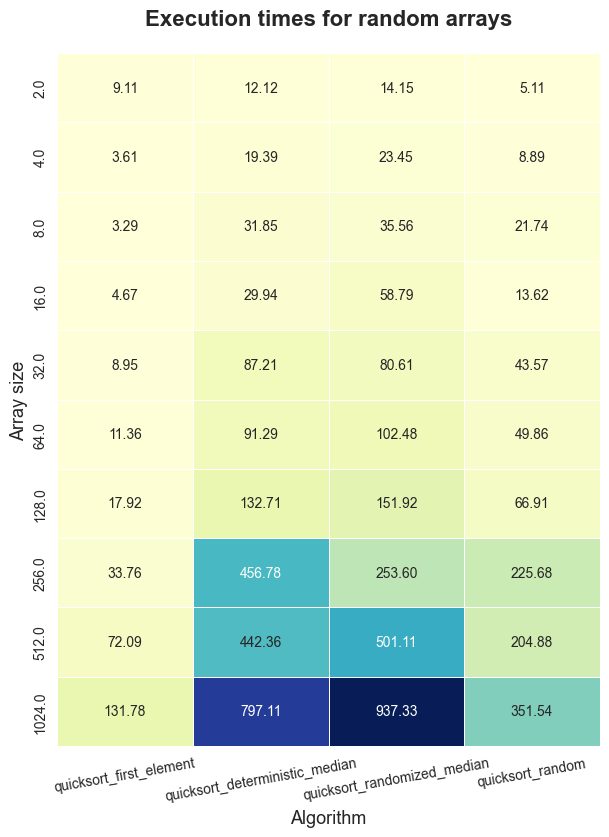

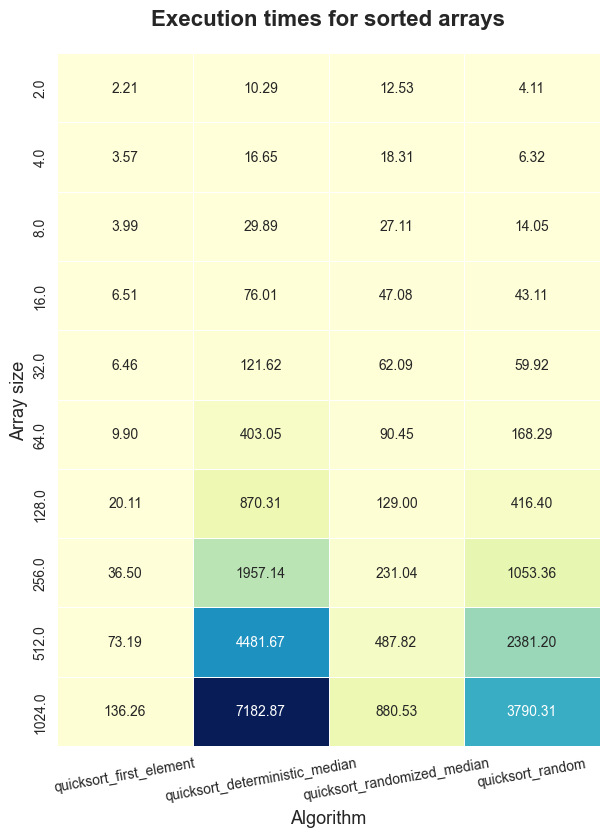

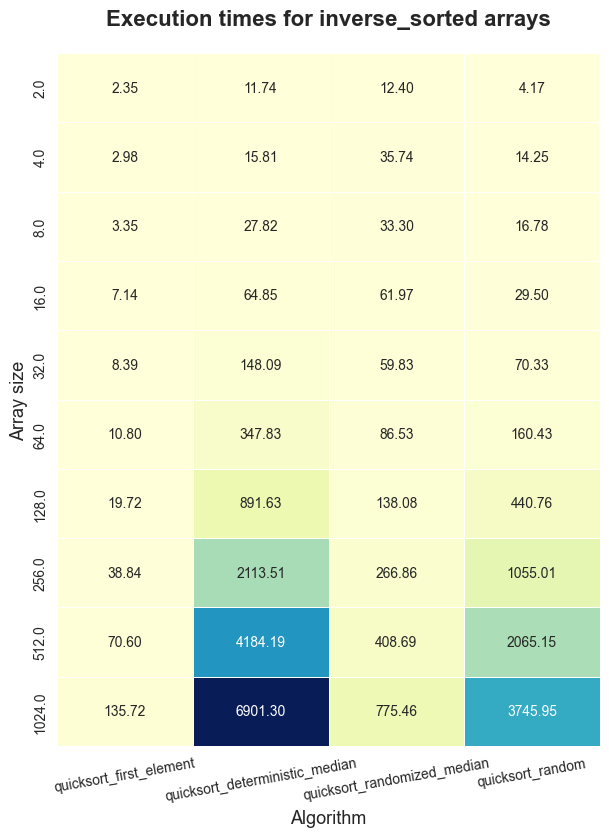

In [17]:
sizes = np.array([2 ** i for i in range(1, 11)])
array_types = ['random', 'sorted', 'inverse_sorted']

execution_times = pd.DataFrame(columns=['size', 'array_type', 'algorithm', 'time'], dtype=np.float64)
millisec = 1000

for size in sizes:
    for array_type in array_types:
        array = generate_random_array(size, sort=(array_type == 'sorted'), inverse=(array_type == 'inverse_sorted'))

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['quicksort_first_element'],
            'time': [timeit(max_min, array, 1000) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['quicksort_deterministic_median'],
            'time': [timeit(median, array, 1000) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['quicksort_randomized_median'],
            'time': [timeit(randomized_median, array, 1000) * millisec]
        })])

        execution_times = pd.concat([execution_times, pd.DataFrame({
            'size': [size],
            'array_type': [array_type],
            'algorithm': ['quicksort_random'],
            'time': [timeit(kth_smallest, array, 1000, k=size // 2) * millisec]
        })])

for array_type in array_types:
    random_execution_times = execution_times[execution_times['array_type'] == array_type]
    pivot = random_execution_times.pivot(index='size', columns='algorithm', values='time')
    pivot = pivot[['quicksort_first_element', 'quicksort_deterministic_median', 'quicksort_randomized_median', 'quicksort_random']]

    plt.figure(figsize=(7, 9))

    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5, cbar=False)

    plt.title(f'Execution times for {array_type} arrays', fontsize=16, pad=20, fontweight='bold')

    plt.xlabel('Algorithm', fontsize=13)
    plt.xticks(rotation=10)
    plt.ylabel('Array size', fontsize=13)
    plt.show()

In [22]:
for algorithm in ['quicksort_first_element', 'quicksort_deterministic_median', 'quicksort_randomized_median', 'quicksort_random']:
        random_execution_times = execution_times[execution_times['algorithm'] == algorithm]
        pivot = random_execution_times.pivot(index='array_type', columns='size', values='time')

        plt.figure(figsize=(7, 9))

        x = pivot.columns

        for array_type in array_types:
            y = pivot.loc[array_type]

            # Interpolate
            x_new = np.linspace(x.min(), x.max(), 100)
            f = interp1d(x, y, kind='quadratic')

            plt.plot(x_new, f(x_new), label=array_type)

        plt.title(algorithm)
        plt.xlabel('Array size')
        plt.ylabel('Execution time (ms)')
        plt.legend()
        plt.show()

KeyError: 'random'

<Figure size 700x900 with 0 Axes>